## Importing essential python libraries and dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [111]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
data= pd.read_csv("Instagram_data.csv", encoding= "latin1")
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [9]:
# checking for null values
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

There are no NULL values in the dataset, let's move to the next step.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


There are 119 entries with 13 features out of which 11 are integers and the rest 2 features are object dtype i.e. Caption and Hashtags.

## Exploratory Data Analysis

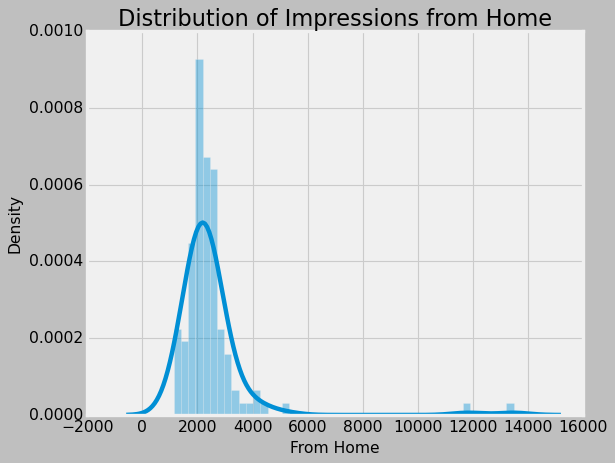

In [112]:
plt.figure(figsize=(8,6))
plt.style.use("fivethirtyeight")
sns.distplot(data["From Home"])
plt.title("Distribution of Impressions from Home")
plt.show()

Looking at the impressions from home, we can say it's hard to reach all the followers daily. From home the reach is 50% (approx.)

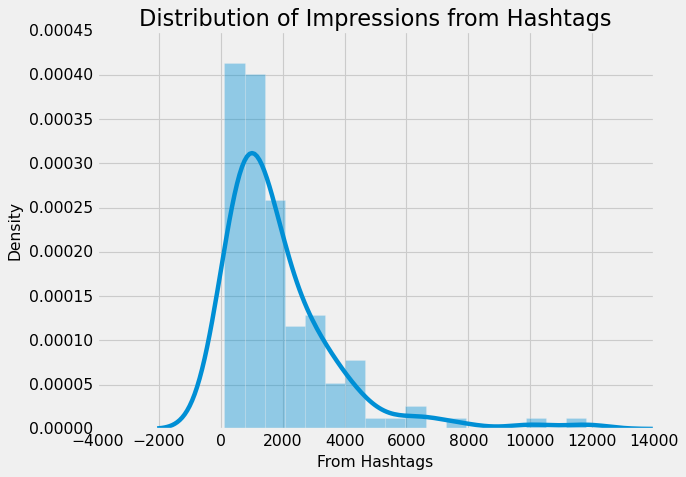

In [113]:
plt.figure(figsize=(8,6))
sns.distplot(data["From Hashtags"])
plt.title("Distribution of Impressions from Hashtags")
plt.show()

Using hashtags we can categorize our posts on Instagram so that we can reach more people based on the particular category of content.  
Looking at hashtags impression we can conclude that many new users can be reached using right hashtags.

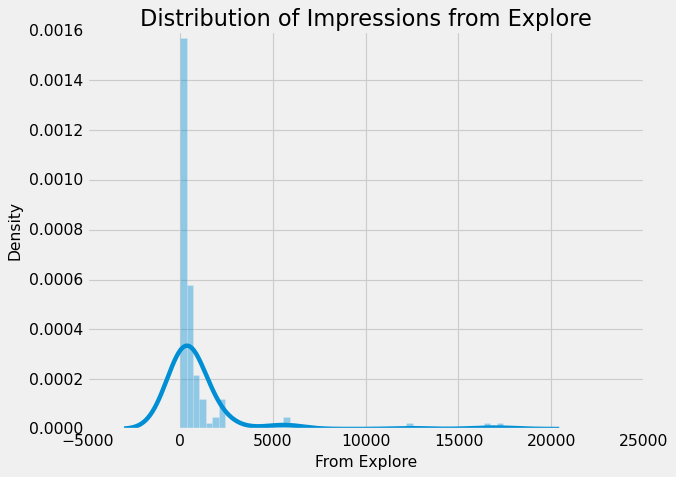

In [114]:
plt.figure(figsize=(8,6))
sns.distplot(data["From Explore"])
plt.title("Distribution of Impressions from Explore")
plt.show()

The explore section of Instagram is the recommendation system of Instagram that recommends posts to the users based on their interests.  
From the above graph we can conclude Instagram doesn't recommend our posts much to the users. Only a few number of post have received a good reach from the explore section.

In [115]:
home= data["From Home"].sum()
hashtags= data["From Hashtags"].sum()
explore= data["From Explore"].sum()
other= data["From Other"].sum()

labels= ["From Home", "From Hashtags", "From Explore", "Other"]
values= [home, hashtags, explore, other]

fig= px.pie(data, values= values, names= labels, title= "Impressions on Instagram Post From various Sources", hole=0.5)
fig.show()

From the above donut plot, we can say most of the reach (i.e. 44.1%) is from the followers of the account, 33.6% is from hashtags, 19.2% is from the explore section, and 3.05% is from other sources.

### Let's analyze the content of Instagram posts from this account.

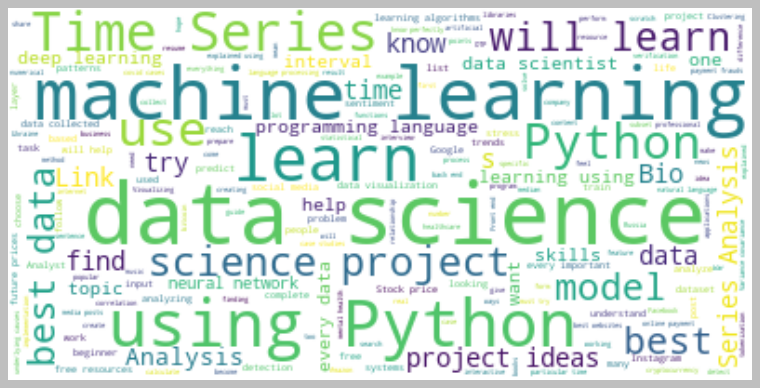

In [62]:
text= " ".join(i for i in data.Caption)
stopwords= set(STOPWORDS)
wordcloud= WordCloud(stopwords= stopwords, background_color="white").generate(text)
plt.style.use("classic")
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

From the above wordcloud of Captions we can say the most common words used in caption of posts are data science, machine learning, and using Python.

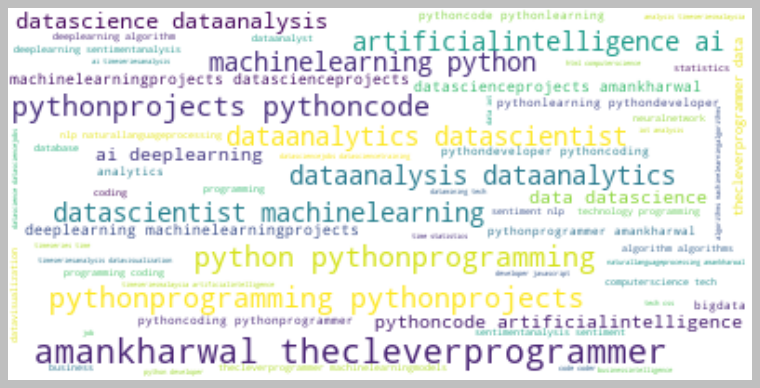

In [116]:
text= " ".join(i for i in data.Hashtags)
stopwords= set(STOPWORDS)
wordcloud= WordCloud(stopwords= stopwords, background_color="white").generate(text)
plt.style.use("classic")
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

The wordcloud of hashtags shows the most common hashtags used in the posts are amankharwal, thecleverprogrammer, pythonprojects and pythoncode.

## Analyzing the relationship between different features
It will help us in understanding how Instagram's algorithm works.

In [75]:
fig= px.scatter(data_frame= data, x="Impressions", y="Likes", trendline= "ols",
                title= "Relationship between Likes and Impressions")
fig.show()

A linear relationship is formed between the number of likes and the reach got on Instagram. Hence more number of likes may result in more reach of posts.

In [78]:
fig= px.scatter(data_frame= data, x="Impressions", y="Comments", trendline="ols", 
                   title= "Relationship between Comments and Total Impressions")
fig.show()

From the above plot, we can say that the number of comments we get on a post doesn't affect its reach.

In [79]:
figure= px.scatter(data_frame= data, x="Impressions", y="Shares", trendline="ols", 
                   title= "Relationship between Shares and Impressions")
figure.show()

A more number of shares will result in a higher reach.

In [80]:
figure= px.scatter(data_frame= data, x="Impressions", y="Saves", trendline="ols", 
                   title= "Relationship between Saves and Impressions")
figure.show()

There is a linear relationship between the number of time a post is saved and the reach of post.

### Let's have a look at the correlation of all the features with the Impression feature. 

In [120]:
correlation= data.corr()
correlation["Impressions"].sort_values(ascending= False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

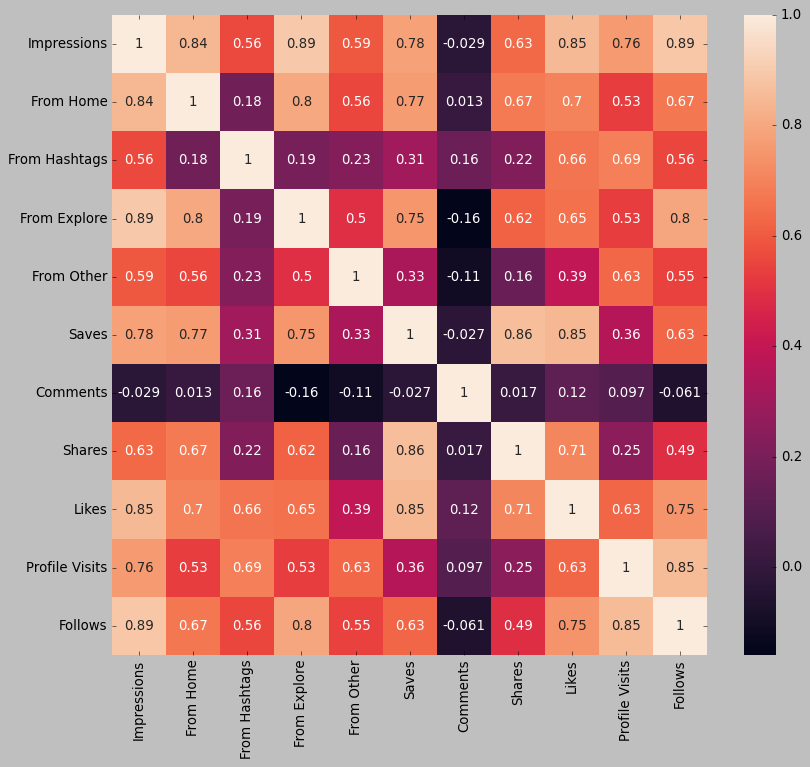

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot= True)
plt.show()

#### Insights
With the above analysis we can say that the most affecting feature is number of "likes" on an Instagram post. More the number of likes on a post, higher will be the reach.    
After likes, the second and third features responsible for the reach of a post are "shares" and "saves" respectively.
"Comments" on a post doesn't affect much of it's reach.

#### Let's look at the conversion rate. 
In Instagram, conversion rate means how many followers you gained from the number of profile visits from a post.  
Formula used, ConversionRate= (Follows/Profile Visits)*100

In [121]:
conversion_rate= (data["Follows"].sum() / data["Profile Visits"].sum())*100
conversion_rate

41.00265604249668

The conversion rate of this Instagram account is 41% which is a very good conversion rate.  
Let's look at the relationship between the total profile visits and the number of followes gained from them.

In [82]:
fig= px.scatter(data_frame= data, x="Profile Visits", y= "Follows", 
                   size="Follows", trendline="ols", 
                   title= "Relationship between Profile visits and Followers gained")
fig.show()

It's a linear relationship.

## Modelling
I will train the model using 3 different algorithms and will pick the best performing one.

In [122]:
#Define x variable and y variable
x= np.array(data[["Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"]])
y= np.array(data["Impressions"])

#Split train and test set
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [123]:
model1= PassiveAggressiveRegressor()
model2= XGBRegressor()
model3= LinearRegression()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

print("PassiveAgressiveRegressor: ",model1.score(X_test, y_test))
print("XGBRegressor: ",model2.score(X_test, y_test))
print("LinearRegression : ",model3.score(X_test, y_test))

PassiveAgressiveRegressor:  0.7962091771338513
XGBRegressor:  0.954075086343203
LinearRegression :  0.8777977785012778


Out of the three models, XGBRegressor gives the best performance. Let's predict the reach of an Instagram post by giving sample imputs to the model.

## Predicting the reach of a Instagram post

In [129]:
#features= [["Likes","Saves", "Comments", "Shares", "Profile Visits", "Follows"]]

features= np.array([[250.0, 100.0, 50.0, 15.0, 120.0, 59.0]])
model2.predict(features)

array([10215.278], dtype=float32)

So in this way we can analyze and predict the reach of an Instagram posts using machine learning. 
  
This project can be useful for influencers, content creators, businesses, and anyone else looking to understand the effectiveness of their Instagram posts to do well on Instagram.